<a href="https://colab.research.google.com/github/khushimehta24/ML_tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
#### Week 1 (Learning Period Synapse)
###### pandas, numpy, matplotlib

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Import pandas, numpy and matplotlib

In [2]:
#write code here

In [3]:
import numpy as np
import pandas as pd
import matplotlib

## 2. load the data 
<br> load the titanic dataset in a pandas dataframe <br> (download dataset from https://www.kaggle.com/c/titanic/data and store it in a folder called <b>"syanpse_w1"</b> in the root of your drive) <br>
Note that you have to download the train and test csv files seperately

In [4]:
train_path = "/content/gdrive/My Drive/synapse_w1/train.csv"
test_path = "/content/gdrive/My Drive/synapse_w1/test.csv"

#write code to load train.csv and test.csv in dataframes
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
#write code to show first five data entries of both dataframes


In [6]:
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


## 3. Exploratory Data Analysis
Exploratory data analysis is a very important part of ML as it helps you understand the data you are dealing with <br>
<br>
(we will be working on the train dataframe in this task)

### 3.a. overview of the dataset

 - write code to list the columns in your dataframe (each column on new line as visibility is important)

In [7]:
#write code here
# train_df.columns
for i in train_df.columns:
  print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


 - write a function that returns the number of rows and columns in the dataset 

In [8]:
#write code here (print values as well)
rows = len(train_df.axes[0])
columns = len(train_df.axes[1])
print('Number of rows = ', rows)
print('Number of columns = ', columns)

Number of rows =  891
Number of columns =  12


 - use the info() method of pandas dataframe to print the info related to the dataframe

In [9]:
# write code here
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - use the describe() method of pandas dataframe to print the statistical description of the dataset

In [10]:
#write code here
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - Find all columns that have unique values. (example : the Gender column has 2 unique values Male and Female) <br>

 - if the columns have finite unique values, then add them in a dictionary of lists and print it <br>
<br>
dictionary should look like : <br>
<t>{<br>&nbsp;&nbsp; "Gender" : ["Male", "Female"],<br>&nbsp;&nbsp; "Col2" : ["unique1", "unique2"],<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>&nbsp;&nbsp;&nbsp;&nbsp;.<br>}

In [11]:
#write code here
i = 0
dicts = {}
keys = list(train_df)
for col in train_df.columns:
  uniqueValues = list(train_df[col].unique())
  if len(uniqueValues) < 10:
    dicts[keys[i]] = uniqueValues
  i = i + 1
for keys , values in dicts.items():
  print(keys, ' : ', values)


Survived  :  [0, 1]
Pclass  :  [3, 1, 2]
Sex  :  ['male', 'female']
SibSp  :  [1, 0, 3, 4, 2, 5, 8]
Parch  :  [0, 1, 2, 5, 3, 4, 6]
Embarked  :  ['S', 'C', 'Q', nan]


### 3.b. Visualizing hidden Details

##### Aim is to find relationship between Title and Survival rate
- print the <b>name</b> column of the data<br>
- notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
- extract the title using regular expression (help given below in the code)
- store the title in a new column in the dataframe. Name the column : <b>Title</b>

In [12]:
#write code here (for regex help refer next code cell)

In [13]:
#regex example
import re

name_eg = "Petranec, Miss. Matilda"
title_search = re.search('(\w+)\.', name_eg) #the first argument is a pattern that we are looking for
print("result:", title_search) #this is the result we get after looking for the pattern
if title_search:
  print("pattern found") #pattern found printed if a pattern like above is found
  title = title_search.group(1) #extracting the pattern found by regular expression (title here)
  print("title:", title) 

result: <re.Match object; span=(10, 15), match='Miss.'>
pattern found
title: Miss


In [14]:
#show the new dataframe with "Title" column here

In [15]:
import re
titleList = []
for name in train_df.Name:
  title_search = re.search('(\w+)\.', name)
  if title_search:
    title = title_search.group(1)
    titleList.append(title)
column_values = pd.Series(titleList)
train_df['Title'] = titleList


In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


- write code to get unique values from the title column
- use the unique titles to find the number of people who survived (1) and number of people who did not (0) for each title. <b>num_survived/total</b> will give the survival rate for that title
- make a new dataframe called <b>SR_df</b> and add the survival rates corresponding to titles in it<br><br>
you may write a function for the above.<br><br>
expected output : <br>
Mr &nbsp;&nbsp; 0.679392<br>
Capt &nbsp;&nbsp; 0.1245<br>
&nbsp;&nbsp;.<br>
&nbsp;&nbsp;.<br>
&nbsp;&nbsp;.<br>


#write code here
unique= train_df.Title.unique()
dic={}

for i in unique :
  count=k=0
  num_sur =0
  for j in train_df['Title']:
    if j==i :
      count +=1
      if train_df.at[k,"Survived"]==1:
        num_sur+=1
    k+=1
  dic[i]= num_sur/count

for key, value in dic.items():
  print(key, ":", value)

In [17]:
#show the new dataframe SR_df here
dict = {}
uniqueTitles = train_df['Title'].unique()
for titles in uniqueTitles:
  k = peopleBelongToThoseTitle = 0
  num_sur = 0
  for i in train_df['Title']:
    if titles == i:
      peopleBelongToThoseTitle += 1
      if train_df.at[k, 'Survived'] == 1:
        num_sur += 1
    k += 1
  dict[titles] = num_sur/peopleBelongToThoseTitle
dict


{'Capt': 0.0,
 'Col': 0.5,
 'Countess': 1.0,
 'Don': 0.0,
 'Dr': 0.42857142857142855,
 'Jonkheer': 0.0,
 'Lady': 1.0,
 'Major': 0.5,
 'Master': 0.575,
 'Miss': 0.6978021978021978,
 'Mlle': 1.0,
 'Mme': 1.0,
 'Mr': 0.15667311411992263,
 'Mrs': 0.792,
 'Ms': 1.0,
 'Rev': 0.0,
 'Sir': 1.0}

In [18]:
SR_df = pd.DataFrame(list(dict.items()), columns=['Title', 'SurvivalRate'])
SR_df

,Title,SurvivalRate
0,Mr,0.156673
1,Mrs,0.792000
2,Miss,0.697802
3,Master,0.575000
4,Don,0.000000
5,Rev,0.000000
6,Dr,0.428571
7,Mme,1.000000
8,Ms,1.000000
9,Major,0.500000


- use SR_df to plot a bar graph for survival rate vs Title

#write code here
import matplotlib.pyplot as plt

SR_df.plot(x='Title',y='SurvivalRate', kind='bar')

This brings us to the end of EDA. <br>
You may feel free to do more exploratry analysis.<br>
The aim of this notebook is not to point out every small detail but to give you an overview and guide you

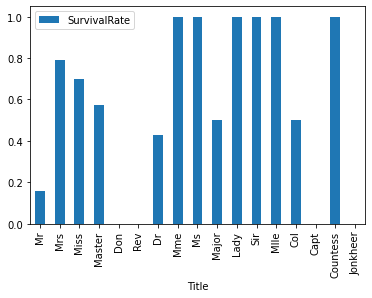

In [19]:
import matplotlib.pyplot as plt

SR_df.plot(x='Title',y='SurvivalRate', kind='bar')

## 4. Data Visualization

- Make a pie chart to show the number of people who survived and number of people who did not
- Make a pie chart to show the number of <b>Males</b> who survived and number of people who did not
- Make a pie chart to show the number of <b>Females</b> who survived and number of people who did not
<br><br>
Note that all three charts must be visible in a single row (look into subplots)

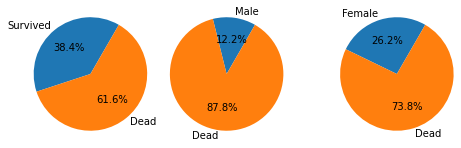

In [20]:
#write code here
survived = 0
not_survived = 0
for i in train_df['Survived']:
  if i == 1:
    survived += 1
  else:
    not_survived += 1

y = np.array([survived, not_survived])



male_survived = 0
people_not_survived = 0
k = 0
for i in train_df['Survived']:
  if i == 1 and train_df.at[k, 'Sex'] == 'male':
    male_survived += 1
  else:
    people_not_survived += 1
  k += 1


female_survived = 0
people2_not_survived = 0
k = 0
for i in train_df['Survived']:
  if i == 1 and train_df.at[k, 'Sex'] == 'female':
    female_survived += 1
  else:
    people2_not_survived += 1
  k += 1

z = np.array([female_survived, people2_not_survived])

x = np.array([male_survived, people_not_survived])
plt.subplot(1,10,1)
plt.pie(y, radius=5, startangle=60, labels=["Survived", "Dead"], autopct = '%.1f%%')
plt.subplot(1,10,5)
plt.pie(x, radius=5, startangle=60, labels=['Male', 'Dead'], autopct = '%.1f%%')
plt.subplot(1,10,10)
plt.pie(z, radius=5, startangle=60, labels=['Female', 'Dead'], autopct = '%.1f%%')
plt.show()


- Find if money affected survival rate (fare and Pclass) 
 - Make a bar graph showing Pclass vs survival rate
 - Make a KDE plot (use the sns library) and plot Fare based on the Survival (google away for this one)

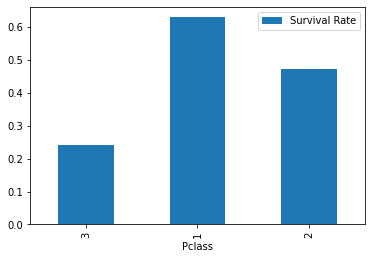

In [21]:
#write code here
dictPclassVsSr = {}
uniquePclasses = train_df['Pclass'].unique()
for classes in uniquePclasses:
  count = k = 0
  num_sur_Pclass = 0
  for i in train_df['Pclass']:
    if classes == i:
      count += 1
      if train_df.at[k, 'Survived'] == 1:
        num_sur_Pclass += 1
    k += 1
  dictPclassVsSr[classes] = num_sur_Pclass/count

# dictPclassVsSr

PclassVsSr_df = pd.DataFrame(list(dictPclassVsSr.items()), columns=['Pclass', 'Survival Rate'])
# PclassVsSr_df


PclassVsSr_df.plot(x='Pclass', y='Survival Rate', kind='bar')
plt.show()

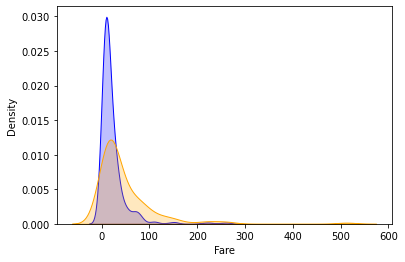

In [22]:
import seaborn as sns
sns.kdeplot(data=train_df.loc[(train_df['Survived']==0), 'Fare'], color="Blue", shade=True, legend=True)
sns.kdeplot(data=train_df.loc[(train_df['Survived']==1), 'Fare'], color="Orange", shade=True, legend=True)
plt.show()

## 5. Preprocessing
preprocessing is a very important step before we step into modelling

 - when we added the Title column in the datadframe, we did preprocessing on the existing data to extract relevant information. As we also tried to explore and understand the data using survival rate, we saw it under EDA.

### 5.a. Removing unnecessary columns

 - The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
 - We will also remove the Name column as we have done <b>feature extraction</b> and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [23]:
#write code to remove unnecessary columns from the dataframe here
# train_df.drop(['PassengerId'], axis = 1, inplace=True)
train_df.drop(['Ticket', 'Name'], axis = 1, inplace=True)

### 5.b. Nan analysis

 - write code to find the percentage of Nans in each column and visualize it in a tabular format

In [24]:
#write code here
isNullDict = {}
for i in train_df.columns:
  x = train_df[i].isnull().sum()
  isNullDict[i] = (x/len(train_df))*100
isNull_df = pd.DataFrame(list(isNullDict.items()), columns=['Column', 'Percentage of NaN'])
isNull_df

,Column,Percentage of NaN
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Sex,0.000000
4,Age,19.865320
5,SibSp,0.000000
6,Parch,0.000000
7,Fare,0.000000
8,Cabin,77.104377
9,Embarked,0.224467


 - remove any column having more than 50% Nans as they would be of no use

In [25]:
#write code here
k = 0
for i in isNull_df.Column:
  if isNull_df.at[k, 'Percentage of NaN'] > 50:
    train_df.drop([i], axis = 1, inplace=True)
  k+=1
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Rev
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,NaN,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


 - Fill Nans in the Embark column with the statistical mode
 - Fill Nans in the Age column with it's statistical mean

In [26]:
#write code here
sCount = cCount = qCount = 0
for i in train_df['Embarked']:
  if i == 'S':
    sCount += 1
  elif i == 'C':
    cCount += 1
  else:
    qCount += 1
x = max(sCount, cCount, qCount)

if x == sCount:
  x = 'S'
elif x == cCount:
  x = 'C'
else:
  x = 'Q'

train_df['Embarked'].fillna(x, inplace=True)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

 - show the new Nan percentage vs column name table after filling and removing to make sure there are no Nans

In [27]:
#write code here

In [28]:
isNullDict = {}
for i in train_df.columns:
  x = train_df[i].isnull().sum()
  isNullDict[i] = (x/len(train_df))*100
isNull_df = pd.DataFrame(list(isNullDict.items()), columns=['Column', 'Percentage of NaN'])
isNull_df

,Column,Percentage of NaN
0,PassengerId,0.0
1,Survived,0.0
2,Pclass,0.0
3,Sex,0.0
4,Age,0.0
5,SibSp,0.0
6,Parch,0.0
7,Fare,0.0
8,Embarked,0.0
9,Title,0.0


### 5.c. Adding features to the dataset

 - Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
 - Using that create a new column called <B>Family_members</b>
 - Fill it with the sum of SibSP and Parch

In [29]:
#write code here
familyMembers = train_df['SibSp'] + train_df['Parch']
train_df['Family_members'] = familyMembers

 - Now you may remove the two columns SibSP and Parch<br>
 It is important to remove them because they introduce multicollinearity in our dataset now as the new column Family_members is directly dependent on them.<br>
 Multicollinearity is deadly to linear models that we will look into later

In [30]:
#write code here

In [31]:
train_df.drop(['SibSp', 'Parch'], axis = 1, inplace=True)

### 5.d. Scaling and Normalization
we don't want to give undue advantage to a few columns (when training models), just because they have a numeric data that is larger in magnitude.<br>
Therefore we scale all values down to a specific range or distribution
<br>

 - Columns to apply scaling on
  - Age
  - Fare
  - Family_members

- Although Pclass column is numeric, it contains classification data (only 1, 2 and 3). Therefore only continuous data like age, fare, etc needs to be normalized

 - Read about standardization and normalization in this link https://www.geeksforgeeks.org/normalization-vs-standardization/
 - apply the formulas given in the link above and scale/normalize the features that are supposed to be scaled
 - It is your choice to choose wether you choose to normalize or standardize a column. You will be able to make your choice after reading the link contents.
 - If you feel confused with the choice, then you can go ahead and directly normalize.

In [32]:
#write code here to normalize data
# normalization of age
max_age = train_df['Age'].max()
min_age = train_df['Age'].min()
a = 0
for i in train_df['Age']:
  if(a < len(train_df['Age'])):
    train_df.at[a, 'Age'] = (i - min_age)/(max_age - min_age)
  a+=1

# normalization of fare
max_fare = train_df['Fare'].max()
min_fare = train_df['Fare'].min()
f = 0
for i in train_df['Fare']:
  if(f < len(train_df['Fare'])):
    train_df.at[f, 'Fare'] = (i - min_fare)/(max_fare - min_fare)
  f+=1

# Standardization of family members
mean_fm = train_df['Family_members'].mean()
std_fm = train_df['Family_members'].std()
fm = 0
for i in train_df['Family_members']:
  if(fm < len(train_df['Family_members'])):
    train_df.at[fm, 'Family_members'] = (i - mean_fm)/std_fm
  fm+=1
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_members
0,1,0,3,male,0.271174,0.014151,S,Mr,0
1,2,1,1,female,0.472229,0.139136,C,Mrs,0
2,3,1,3,female,0.321438,0.015469,S,Miss,0
3,4,1,1,female,0.434531,0.103644,S,Mrs,0
4,5,0,3,male,0.434531,0.015713,S,Mr,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.334004,0.025374,S,Rev,0
887,888,1,1,female,0.233476,0.058556,S,Miss,0
888,889,0,3,female,0.367921,0.045771,S,Miss,1
889,890,1,1,male,0.321438,0.058556,C,Mr,0



train_df

### 5.e. One hot encoding
Machine Learning models do not understand strings <br>
They understand numbers<br>
That is one of the reasons why we one hot encode few columns<br>

- refer this link for more information : https://datagy.io/pandas-get-dummies/
- you can use this or directly look into pandas get_dummies() method to implement this

- columns to apply one_hot encoding on
 - Pclass
 - Sex
 - Title
 - Embarked


In [33]:
#write code here
categorical_columns = ['Pclass', 'Sex', 'Title', 'Embarked']
for column in categorical_columns:
    tempdf = pd.get_dummies(train_df[column], prefix=column)
    train_df = pd.merge(
        left=train_df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    train_df = train_df.drop(columns=column)


In [35]:
#show the final dataframe here
train_df

,PassengerId,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0.271174,0.014151,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,1,0.472229,0.139136,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,1,0.321438,0.015469,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,1,0.434531,0.103644,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,0,0.434531,0.015713,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0.334004,0.025374,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
887,888,1,0.233476,0.058556,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
888,889,0,0.367921,0.045771,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
889,890,1,0.321438,0.058556,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


End of Preprocessing